# Piotruś i Wilk: Wprowadzenie do Uczenia ze Wzmocnieniem

W tym tutorialu nauczymy się, jak zastosować uczenie ze wzmocnieniem do problemu znajdowania ścieżek. Scenariusz jest inspirowany muzyczną bajką [Piotruś i Wilk](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) rosyjskiego kompozytora [Siergieja Prokofiewa](https://en.wikipedia.org/wiki/Sergei_Prokofiev). To opowieść o młodym pionierze Piotrusiu, który odważnie wychodzi z domu na polanę w lesie, aby ścigać wilka. Wytrenujemy algorytmy uczenia maszynowego, które pomogą Piotrusiowi eksplorować otaczający teren i stworzyć optymalną mapę nawigacyjną.

Najpierw zaimportujmy kilka przydatnych bibliotek:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Przegląd Uczenia ze Wzmocnieniem

**Uczenie ze Wzmocnieniem** (RL) to technika uczenia, która pozwala nam nauczyć się optymalnego zachowania **agenta** w określonym **środowisku** poprzez przeprowadzanie wielu eksperymentów. Agent w tym środowisku powinien mieć określony **cel**, zdefiniowany przez **funkcję nagrody**.

## Środowisko

Dla uproszczenia, rozważmy świat Piotra jako kwadratową planszę o wymiarach `width` x `height`. Każde pole na tej planszy może być:
* **ziemią**, po której Piotr i inne stworzenia mogą chodzić
* **wodą**, po której oczywiście nie można chodzić
* **drzewem** lub **trawą** - miejscem, gdzie można odpocząć
* **jabłkiem**, które symbolizuje coś, co Piotr chętnie znajdzie, aby się posilić
* **wilkiem**, który jest niebezpieczny i należy go unikać

Aby pracować ze środowiskiem, zdefiniujemy klasę o nazwie `Board`. Aby nie zaśmiecać tego notatnika, cały kod związany z obsługą planszy został przeniesiony do osobnego modułu `rlboard`, który teraz zaimportujemy. Możesz zajrzeć do tego modułu, aby uzyskać więcej szczegółów na temat implementacji.


Stwórzmy teraz losową planszę i zobaczmy, jak wygląda:


In [4]:
# code block 1

## Akcje i Polityka

W naszym przykładzie celem Piotra jest znalezienie jabłka, unikając przy tym wilka i innych przeszkód. Zdefiniuj te akcje jako słownik i przypisz je do par odpowiadających zmian współrzędnych.


In [5]:
# code block 2

Strategia naszego agenta (Piotra) jest określana za pomocą tak zwanej **polityki**. Rozważmy najprostszą politykę, zwaną **losowym spacerem**.

## Losowy spacer

Najpierw rozwiążmy nasz problem, implementując strategię losowego spaceru.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Funkcja nagrody

Aby nasza polityka była bardziej inteligentna, musimy zrozumieć, które ruchy są "lepsze" od innych.


In [8]:
#code block 5

## Q-Learning

Zbuduj Q-Table, czyli wielowymiarową tablicę. Ponieważ nasza plansza ma wymiary `width` x `height`, możemy reprezentować Q-Table jako tablicę numpy o kształcie `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Przekaż tabelę Q do funkcji `plot`, aby zwizualizować tabelę na planszy:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Istota Q-Learning: Równanie Bellmana i Algorytm Uczenia

Napisz pseudokod dla naszego algorytmu uczenia:

* Zainicjalizuj Q-Tablicę Q równymi wartościami dla wszystkich stanów i akcji
* Ustaw współczynnik uczenia $\alpha\leftarrow 1$
* Powtarzaj symulację wiele razy
   1. Rozpocznij w losowej pozycji
   1. Powtarzaj
        1. Wybierz akcję $a$ w stanie $s$
        2. Wykonaj akcję, przechodząc do nowego stanu $s'$
        3. Jeśli napotkamy warunek końca gry lub całkowita nagroda jest zbyt mała - zakończ symulację  
        4. Oblicz nagrodę $r$ w nowym stanie
        5. Zaktualizuj funkcję Q zgodnie z równaniem Bellmana: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Zaktualizuj całkowitą nagrodę i zmniejsz $\alpha$.

## Eksploatacja vs. Eksploracja

Najlepszym podejściem jest znalezienie równowagi między eksploracją a eksploatacją. W miarę jak coraz lepiej poznajemy nasze środowisko, będziemy bardziej skłonni podążać optymalną trasą, jednak warto od czasu do czasu wybrać nieodkrytą ścieżkę.

## Implementacja w Pythonie

Teraz jesteśmy gotowi zaimplementować algorytm uczenia. Zanim to zrobimy, potrzebujemy również funkcji, która przekształci dowolne liczby w Q-Tablicy w wektor prawdopodobieństw dla odpowiadających akcji:


In [10]:
# code block 7

Dodajemy niewielką wartość `eps` do oryginalnego wektora, aby uniknąć dzielenia przez 0 w początkowym przypadku, gdy wszystkie składniki wektora są identyczne.

Rzeczywisty algorytm uczenia, który przeprowadzimy przez 5000 eksperymentów, nazywanych również **epokami**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Po wykonaniu tego algorytmu, tabela Q powinna zostać zaktualizowana wartościami określającymi atrakcyjność różnych działań na każdym kroku. Zwizualizuj tabelę tutaj:


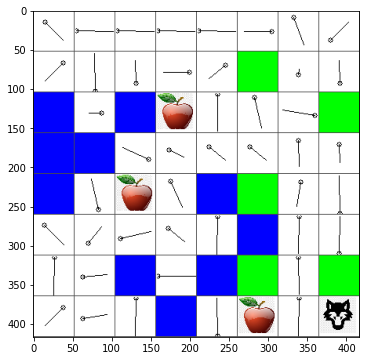

In [43]:
m.plot(Q)

## Sprawdzanie Polityki

Ponieważ Q-Table przedstawia „atrakcyjność” każdej akcji w każdym stanie, bardzo łatwo jest wykorzystać ją do zdefiniowania efektywnej nawigacji w naszym świecie. W najprostszym przypadku możemy po prostu wybrać akcję odpowiadającą najwyższej wartości w Q-Table:


In [13]:
# code block 9

2

Jeśli spróbujesz powyższego kodu kilka razy, możesz zauważyć, że czasami po prostu "zawiesza się" i musisz nacisnąć przycisk STOP w notebooku, aby go przerwać.

> **Zadanie 1:** Zmodyfikuj funkcję `walk`, aby ograniczyć maksymalną długość ścieżki do określonej liczby kroków (np. 100), i obserwuj, jak powyższy kod zwraca tę wartość od czasu do czasu.

> **Zadanie 2:** Zmodyfikuj funkcję `walk`, aby nie wracała do miejsc, w których już wcześniej była. To zapobiegnie zapętleniu `walk`, jednak agent nadal może utknąć w miejscu, z którego nie będzie mógł się wydostać.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


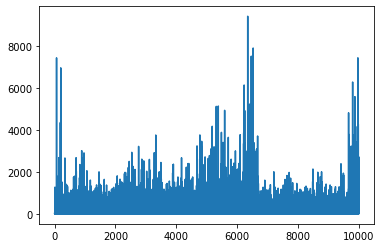

In [57]:
plt.plot(lpath)

## Ćwiczenie
## Bardziej realistyczny świat Piotrusia i Wilka



---

**Zastrzeżenie**:  
Ten dokument został przetłumaczony za pomocą usługi tłumaczenia AI [Co-op Translator](https://github.com/Azure/co-op-translator). Chociaż dokładamy wszelkich starań, aby zapewnić poprawność tłumaczenia, prosimy pamiętać, że automatyczne tłumaczenia mogą zawierać błędy lub nieścisłości. Oryginalny dokument w jego języku źródłowym powinien być uznawany za autorytatywne źródło. W przypadku informacji o kluczowym znaczeniu zaleca się skorzystanie z profesjonalnego tłumaczenia przez człowieka. Nie ponosimy odpowiedzialności za jakiekolwiek nieporozumienia lub błędne interpretacje wynikające z użycia tego tłumaczenia.
